In [80]:
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os


In [7]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels.head()


,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [23]:
# Plot the distribution of lodging revune for top 5 countries
top5_cntry = ["PRT", "ESP", "FRA", "DEU", "GBR"]

# Filter to bookings with roomnights under 15 and keep the nationalities
hotels_sub = hotels[(hotels["Nationality"].isin(top5_cntry)) & (hotels["RoomNights"] < 15)]

hotels_sub = hotels_sub[["Nationality", "LodgingRevenue", "RoomNights"]]

hotels_sub["Nationality"].value_counts()
hotels_sub["RoomNights"].value_counts()


RoomNights
0     10448
3      9670
2      8838
1      7048
4      6266
5      2971
7      1113
6       933
8       172
9        95
10       89
11       37
12       27
14       19
13       11
Name: count, dtype: int64

In [ ]:
# Another way to do the query using SQL'ish language
# Filter, then keep the two columns that you need using the location indexing
hotels.query("Nationality.isin(@top5_cntry) & RoomNights < 15").loc[:, ["Nationality","LodgingRevenue"]]

,Nationality,LodgingRevenue
0,PRT,371.0
1,PRT,280.0
2,DEU,0.0
3,FRA,240.0
4,FRA,0.0
...,...,...
83579,PRT,0.0
83580,DEU,176.0
83581,DEU,0.0
83582,FRA,143.0


In [36]:
hotels_sub.columns


Index(['Nationality', 'LodgingRevenue', 'RoomNights'], dtype='object')

/var/folders/mv/y6dng09x31s7lvvx2x62hf1r0000gn/T/ipykernel_7018/1859702675.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


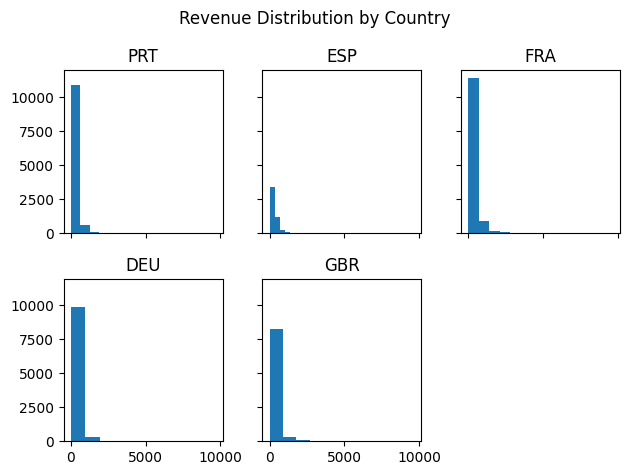

In [52]:
fig, ax = plt.subplots(2, 3, constrained_layout = True, sharex = "all", sharey = "all")

ax[0][0].hist(hotels_sub.loc[hotels_sub["Nationality"] == "PRT", ["LodgingRevenue"]])
ax[0][0].set_title("PRT")

ax[0][1].hist(hotels_sub.loc[hotels_sub["Nationality"] == "ESP", ["LodgingRevenue"]])
ax[0][1].set_title("ESP")

ax[0][2].hist(hotels_sub.loc[hotels_sub["Nationality"] == "FRA", ["LodgingRevenue"]])
ax[0][2].set_title("FRA")

ax[1][0].hist(hotels_sub.loc[hotels_sub["Nationality"] == "DEU", ["LodgingRevenue"]])
ax[1][0].set_title("DEU")

ax[1][1].hist(hotels_sub.loc[hotels_sub["Nationality"] == "GBR", ["LodgingRevenue"]])
ax[1][1].set_title("GBR")

ax[1][2].set_axis_off()

fig.suptitle("Revenue Distribution by Country")

plt.tight_layout()

AttributeError: 'GrouperView' object has no attribute 'join'

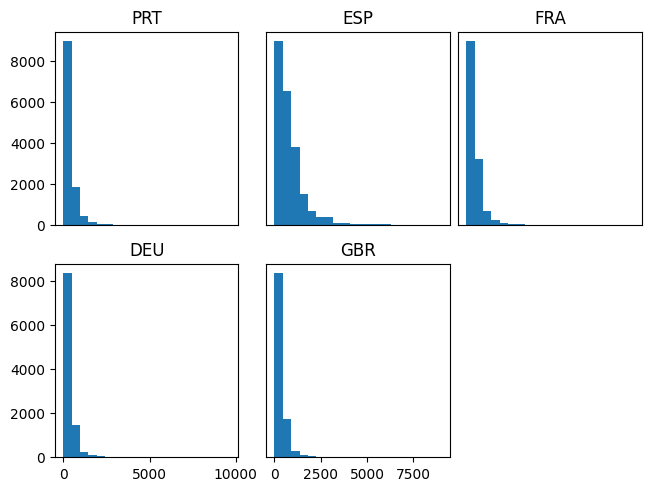

In [60]:
# Using a loop to accomplish the same thing

country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

ax_list = []

nrows, ncols = (2, 3)

fig = plt.figure(constrained_layout=True)

for i, country in enumerate(country_list):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.hist(
        (hotels
         .query(f"Nationality == '{country}' & RoomNights < 15")
         .loc[ :, "LodgingRevenue"]),
        bins=20,
    )

    ax.set_title(f"{country}")
    ax_list.append(ax)

    if i % ncols != 0:
        ax.set_yticks([])
    
    if (i / ncols) < nrows - 1 :
        ax.set_xticks([])

ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

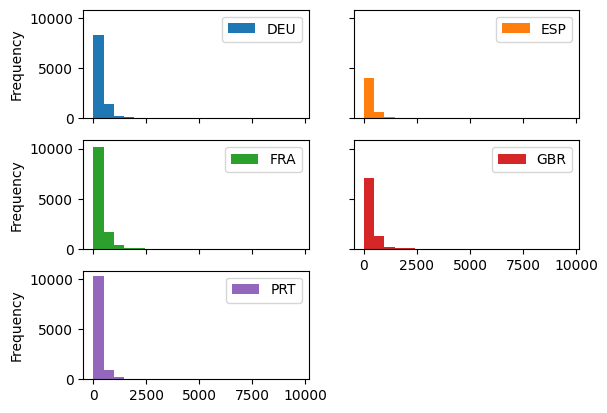

In [63]:
#Using Pandas
hotels_pivot = (
    hotels
    .query("Nationality in @country_list and RoomNights < 15")
    .pivot_table(
        index = "ID",
        columns = "Nationality",
        values = "LodgingRevenue"
    )
)

hotels_pivot.plot.hist(subplots = True,
                       bins = 20,
                       layout = (3, 2),
                       sharex = True,
                       sharey = True);

In [64]:
# Colors - can be added by specifying a list of colors
data = [x for x in range(10)]
data2 = [x * 2 for x in range(10)]

In [ ]:
# changes default settings of colors used
plt.rcParams["axes.prop_cycle"] = plt.cycler(color = ["red", "orange", "grey", "green"])
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors) # Sets it to Dark2 as default.

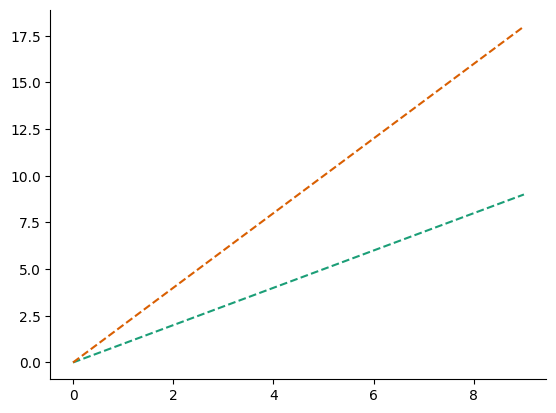

In [76]:
fig, ax = plt.subplots()

ax.plot(data, 
        #c = "green"
        )
ax.plot(data2, 
        #c= "blue"
        )

In [ ]:
# These are the default settings for a plot, these can be changed globally
plt.rc("axes.spines", top = False, right = False)
plt.rcParams["lines.linestyle"] = "--"

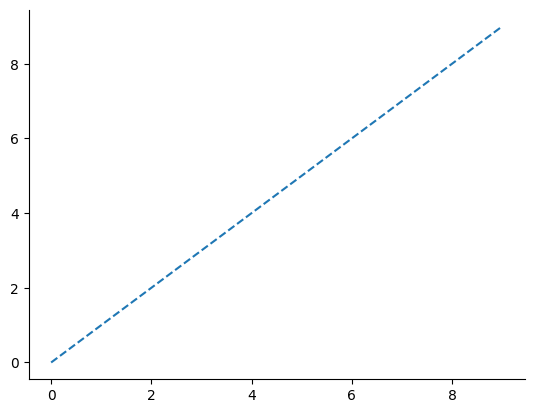

In [70]:
fig, ax = plt.subplots()
ax.plot(data)

In [98]:
# Look under the hood of a stylesheet
print(plt.style.available)

plt.style.library["seaborn-v0_8-darkgrid"] # Now this should work!

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Arial',
                              'Liberation Sans',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                              'sans-serif'],
          'grid.color': 'white',
          'grid.linestyle': '-',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': <CapStyle.round: 'round'>,
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytic